<a href="https://colab.research.google.com/github/AnnaMatochkina/final-certification/blob/main/%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D1%84%D0%B0%D0%B9%D0%BB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#43a' size='6'> **Импорт и установка библиотек**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import *
from sklearn.decomposition import PCA
import gdown
import random
import scipy
from itertools import product
from scipy.stats import chi2_contingency
from joblib import dump

# <font color='#43a' size='6'> **Загрузка данных**

In [62]:
#https://drive.google.com/file/d/1oL-WlsecIanu1mZTsOdq3kaWJttrUeCq/view?usp=sharing
url = "https://drive.google.com/uc?id=1oL-WlsecIanu1mZTsOdq3kaWJttrUeCq"
gdown.download(url, 'reports_private_property_384.csv', quiet=True)
df = pd.read_csv('reports_private_property_384.csv')
df.head(10)

,ID,1110,1120,1130,1140,1150,1160,1170,1180,1190,...,2410,2421,2430,2450,2460,2400,2510,2520,2500,financial_stability
0,2543105585,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,unstable
1,2502054275,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,unstable
2,2502054282,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,131.0000,0.0000,0.0000,0.0000,0.0000,653.0000,0.0000,0.0000,653.0000,unstable
3,2502054250,0.0000,0.0000,0.0000,0.0000,629489.0000,0.0000,0.0000,3814.0000,0.0000,...,1764.0000,472.0000,-36.0000,3.0000,0.0000,9545.0000,0.0000,0.0000,9545.0000,unstable
4,2521014373,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,3.0000,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,10.0000,unstable
5,2301091076,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,158.0000,0.0000,0.0000,0.0000,0.0000,1922.0000,0.0000,0.0000,0.0000,stable
6,2308227978,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,18.0000,0.0000,0.0000,0.0000,0.0000,-468.0000,0.0000,0.0000,-468.0000,unstable
7,2811076678,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,235.0000,0.0000,0.0000,0.0000,0.0000,444.0000,0.0000,0.0000,0.0000,unstable
8,2801217136,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,135.0000,0.0000,0.0000,135.0000,unstable
9,2801217104,269.0000,0.0000,0.0000,0.0000,2965.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,25480.0000,0.0000,0.0000,25480.0000,stable


<font color='#11a' size='4'> Описание данных

В данных представлена информация бухгалтерского баланса и отчета о финансовых результатах организаций с кодом ОКФС = 16 - частная собственность, за 2018 год. Единица измерения тыс. руб.

*   ID - ИНН организации
*   1110 - 2500 строки отчетности
*   financial_stability - показывает к какой группе финансовой устойчивости относится организация (stable/unstable - устойчивое/неустойчивое финанасовое положение).

Столбец 1100 "Внеоборотные активы" является суммой столбцов 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180 и 1190.

Столбец 1200 " Оборотные активы" является суммой столбцов 1210, 1220, 1230, 1240, 1250, 1260.

Столбец 1600 "Актив" является суммой столбцов 1100 и 1200.

Столбец 1300 " Капитал и резервы" является суммой столбцов 1310, 1320, 1340, 1350, 1360, 1370.

Столбец 1400 "Долгосрочные обязательства" является суммой столбцов 1410, 1420, 1430, 1440, 1450.

Столбец 1500 "Краткосрочные обязательства" является суммой столбцов 1510, 1520, 1530, 1540, 1550.

Столбец 1700 " Пассив" является суммой столбцов 1300, 1400 и 1500.

Столбец 2100 "Валовая прбыль (убыток)" является разностью столбцов  2110 и 2120.

Кроме того, вычисляемые столбцы: 2300 "Прибыль (убыток) до налогообложения", 2400 "Чистая прибыль (убыток)", 2500 "Совокупный финансовый результат".



# <font color='#11a' size='6'> **Разведочный анализ данных**

<font color='#11a' size='4'> Размер датасета

In [ ]:
memory_bytes = df.memory_usage(deep=True).sum()
memory_gb = memory_bytes / (1024 ** 3)
print(f'Размер датасета: {memory_gb:.4f} ГБ')

Размер датасета: 0.4755 ГБ


<font color='#11a' size='4'> Количество строк и столбцов

In [ ]:
rows, columns = df.shape
print(f'Количество строк: {rows}, Количество столбцов: {columns}')

Количество строк: 966253, Количество столбцов: 60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966253 entries, 0 to 966252
Data columns (total 60 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   966253 non-null  int64  
 1   1110                 966253 non-null  float64
 2   1120                 966253 non-null  float64
 3   1130                 966253 non-null  float64
 4   1140                 966253 non-null  float64
 5   1150                 966253 non-null  float64
 6   1160                 966253 non-null  float64
 7   1170                 966253 non-null  float64
 8   1180                 966253 non-null  float64
 9   1190                 966253 non-null  float64
 10  1100                 966253 non-null  float64
 11  1210                 966253 non-null  float64
 12  1220                 966253 non-null  float64
 13  1230                 966253 non-null  float64
 14  1240                 966253 non-null  float64
 15  1250             

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df.describe(include='float')

,1110,1120,1130,1140,1150,1160,1170,1180,1190,1100,...,2300,2410,2421,2430,2450,2460,2400,2510,2520,2500
count,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,...,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00
mean,2680.16,208.65,356.27,134.54,35966.73,2569.96,67942.44,2161.40,4664.47,116684.62,...,8588.90,1810.46,154.63,-187.31,322.09,-256.84,6666.86,222.84,-20.83,6864.97
std,979999.30,42560.90,79387.42,27547.32,1900301.97,255587.46,26465953.77,191987.04,283002.18,26682010.70,...,1281164.16,182009.37,68564.88,34199.54,33503.30,52201.67,1102875.01,33665.37,11303.66,1104719.14
min,-10810.00,-66000.00,0.00,-22.00,-120623.00,-32917.00,-4624.00,-186182.00,-230959.00,-220959.00,...,-390790903.00,-2925132.00,-17684818.00,-20242630.00,-8654003.00,-41478097.00,-390792969.00,-3597260.00,-6418671.00,-390792969.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,28.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00,11.00
75%,0.00,0.00,0.00,0.00,321.00,0.00,0.00,0.00,0.00,689.00,...,664.00,60.00,0.00,0.00,0.00,0.00,507.00,0.00,0.00,497.00
max,736000000.00,36310537.00,57899221.00,9552069.00,866873313.00,192083602.00,25710120000.00,169347000.00,146248384.00,25710120000.00,...,1008390471.00,161206175.00,38832669.00,5252563.00,12897140.00,5949629.00,827641293.00,18713757.00,7533057.00,828804656.00


In [ ]:
df.describe(include='object')

,financial_stability
count,966253
unique,2
top,unstable
freq,660613


##<font color='#11a' size='4'> Графики

In [64]:
# Построим графики для укрупненных показателей
num_features = '1100', '1200', '1300', '1400', '1500', '1600' , '2100', '2400'

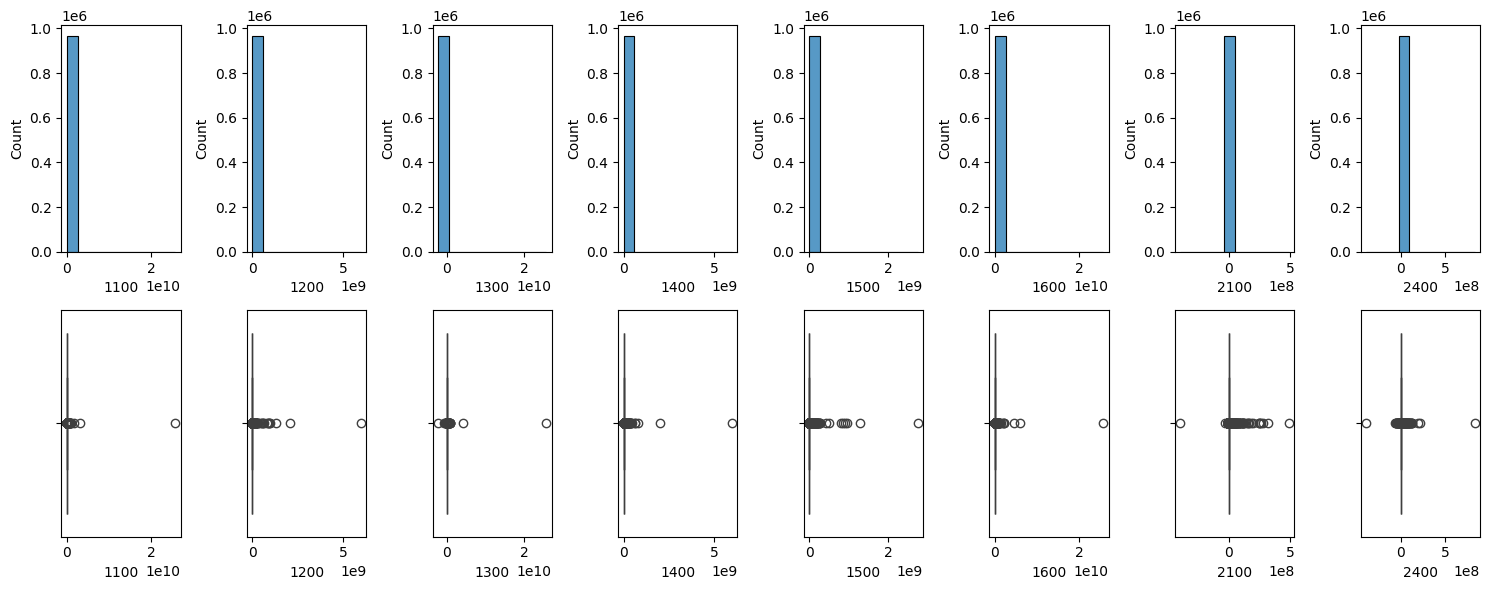

In [65]:
# Гистограммы
plt.figure(figsize = (15, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, len(num_features), i)
    sns.histplot(df[col], bins = 10)
# Box plot
for i, col in enumerate(num_features, 1):
    plt.subplot(2, len(num_features), i + len(num_features))
    sns.boxplot(x = df[col])

plt.tight_layout()
plt.show()

По всем показателям наблюдаются выбросы, в данных представлены организации разного размера.

<Figure size 1200x600 with 0 Axes>

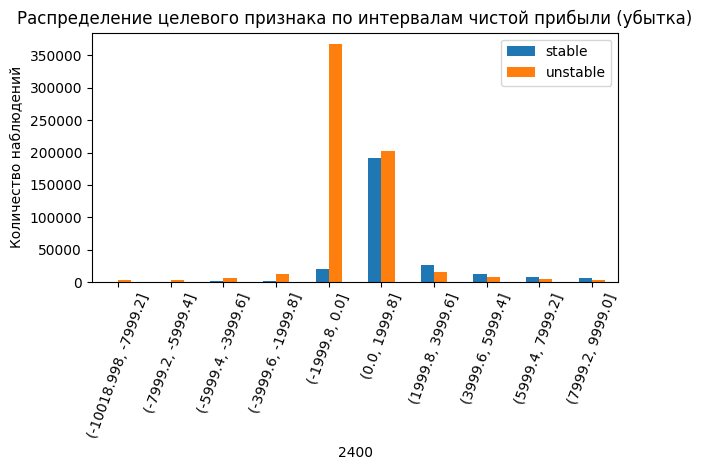

In [67]:
# Группировка данных по чистой прибыли от - 10 млн. руб. до 10 млн. руб.
binned = pd.cut(df['2400'][(df['2400'] < 10000) & (df['2400'] > -10000)], bins=10)
grouped = df.groupby([binned, 'financial_stability'], observed=True).size().unstack()

plt.figure(figsize=(12, 6))
grouped.plot(kind='bar')
plt.title('Распределение целевого признака по интервалам чистой прибыли (убытка)')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

Можно сделать вывод, что при увеличении читой прибыли, увеличивается доля финансово устойчивых организаций. Далее проверим это статистически.

In [ ]:
# Определение кода субъекта РФ по первым двум цифрам ИНН
df['code_subject'] = df['ID'].astype(str).str[:2].astype(int)

<Figure size 1200x600 with 0 Axes>

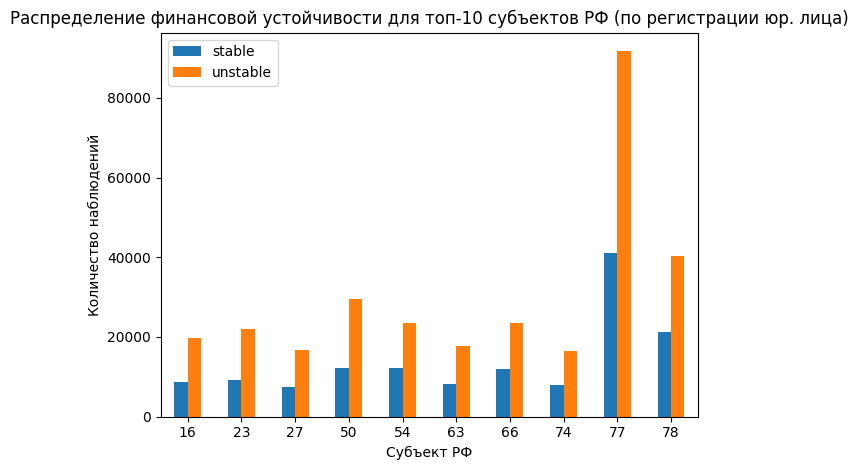

In [ ]:
# Получаем топ-10 самых частых значений code_subject
top_codes = df['code_subject'].value_counts().nlargest(10).index

# Фильтруем DataFrame только по этим значениям
df_filtered = df[df['code_subject'].isin(top_codes)]

# Группируем по code_subject и financial_stability
grouped = df_filtered.groupby(['code_subject', 'financial_stability'], observed=True).size().unstack(fill_value=0)

# Строим график
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar')
plt.title('Распределение финансовой устойчивости для топ-10 субъектов РФ (по регистрации юр. лица)')
plt.ylabel('Количество наблюдений')
plt.xlabel('Субъект РФ')
plt.xticks(rotation=360)
plt.tight_layout()
plt.legend()
plt.show()

Наибольшее число организаций зарегистрировано в г. Москва (77), второе место занимает г. Санкт - Петербург (78), далее идут Московская область (50), Новосибирская область (54), Свердловская область (66), Краснодарский край (23) и т.д.

In [ ]:
df = df.drop('code_subject', axis=1)

# <font color='#11a' size='6'> **Предобработка данных**

In [ ]:
# Проверка на пропуски
df.isna().sum()

,0
ID,0
1110,0
1120,0
1130,0
1140,0
1150,0
1160,0
1170,0
1180,0
1190,0


По всем показателям наблюдаются выбросы, но так как каждый показатель отчетности может оказать влияние на финансовое положение, замена значений на среднее или медиану кажется недопустимой. **Сузим выборку с учетом межквартильного интервала по столбцу 1600 - Валюта баланса.**

In [68]:
# Сузим выборку с учетом межквартильного интервала по столбцу 1600 - Валюта баланса.
q_first = df['1600'].quantile(0.25)
q_third = df['1600'].quantile(0.75)
iqr = q_third - q_first
df_iqr = df[(df['1600'] >= (q_first - 1.5 * iqr)) & (df['1600'] <= (q_third + 1.5 * iqr))]

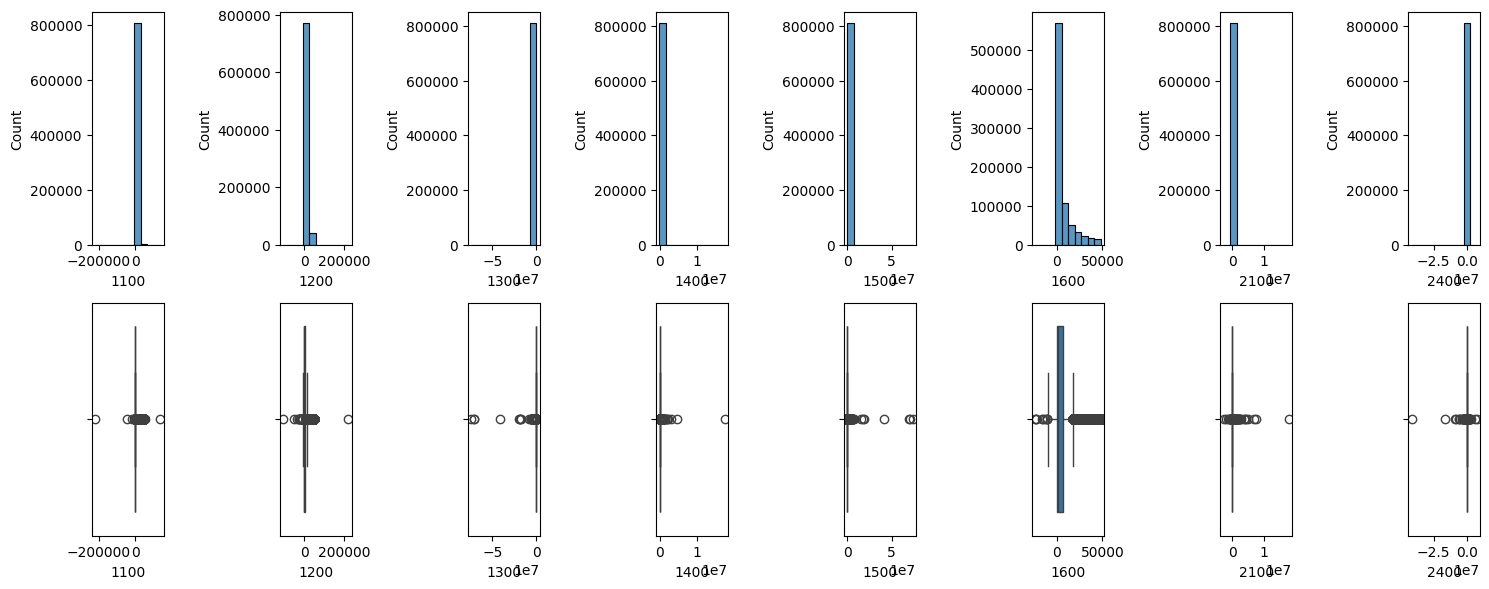

In [69]:
# Гистограммы
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, len(num_features), i)
    sns.histplot(df_iqr[col], bins=10)
# Box plot
for i, col in enumerate(num_features, 1):
    plt.subplot(2, len(num_features), i + len(num_features))
    sns.boxplot(x=df_iqr[col])

plt.tight_layout()
plt.show()

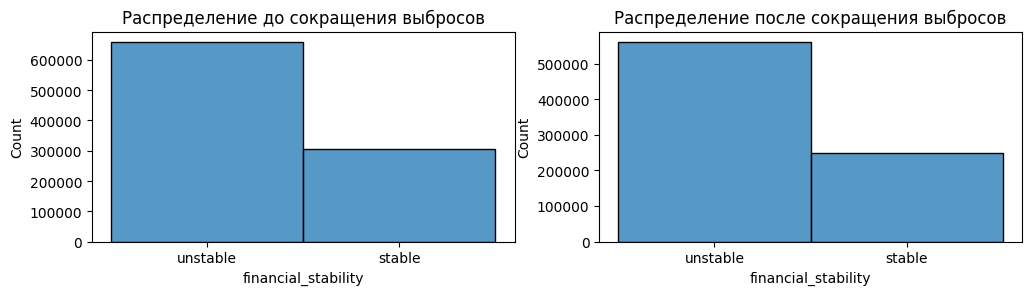

In [70]:
# Гистограммы
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
sns.histplot(df['financial_stability'], bins=2)
plt.title(f'Распределение до сокращения выбросов')

plt.subplot(2, 2, 2)
sns.histplot(df_iqr['financial_stability'], bins=2)
plt.title(f'Распределение после сокращения выбросов')
plt.show()

Сокращение выборки значительно не повлияло на распределение по целевому показателю.

## <font color='#11a' size='4'> Обработка категориальных значений

In [71]:
# Обработка целевого признака
df_iqr['fin_stab_encoded'] = np.where(df_iqr['financial_stability'] == 'unstable', 0, 1)

/tmp/ipython-input-4228979647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['fin_stab_encoded'] = np.where(df_iqr['financial_stability'] == 'unstable', 0, 1)


In [72]:
df_iqr.head(5)

,ID,1110,1120,1130,1140,1150,1160,1170,1180,1190,...,2421,2430,2450,2460,2400,2510,2520,2500,financial_stability,fin_stab_encoded
0,2543105585,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,unstable,0
1,2502054275,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,unstable,0
4,2521014373,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,10.0000,unstable,0
5,2301091076,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1922.0000,0.0000,0.0000,0.0000,stable,1
6,2308227978,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,-468.0000,0.0000,0.0000,-468.0000,unstable,0


In [73]:
df_iqr.drop('financial_stability', axis = 1, inplace = True)

/tmp/ipython-input-3133309960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr.drop('financial_stability', axis = 1, inplace = True)


In [74]:
df_iqr.head(5)

,ID,1110,1120,1130,1140,1150,1160,1170,1180,1190,...,2410,2421,2430,2450,2460,2400,2510,2520,2500,fin_stab_encoded
0,2543105585,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
1,2502054275,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
4,2521014373,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,3.0000,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,10.0000,0
5,2301091076,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,158.0000,0.0000,0.0000,0.0000,0.0000,1922.0000,0.0000,0.0000,0.0000,1
6,2308227978,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,18.0000,0.0000,0.0000,0.0000,0.0000,-468.0000,0.0000,0.0000,-468.0000,0


# <font color='#11a' size='6'> **Проверка статистических гипотез**

**Проверим гипотезу 1:**

H0: Средняя чистая прибыль для финансово устойчивых организаций не отличается от средней чистой прибыли финансово неустойчивых организаций.

H1: Средняя чистая прибыль для финансово устойчивых организаций отличается от средней чистой прибыли финансово неустойчивых организаций.

In [75]:
# Критерий пермутаций
fin_stab = np.array(df_iqr['2400'][df_iqr['fin_stab_encoded'] == 1])
fin_unstab = np.array(df_iqr['2400'][df_iqr['fin_stab_encoded'] == 0])

In [76]:
# Сократим каждую выборку до 20 000 наблюдений
np.random.seed(42)
random.seed(42)
p_value = 0.05
fin_stab = np.random.choice(fin_stab, size=20000, replace=False)
fin_unstab = np.random.choice(fin_unstab, size=20000, replace=False)
print(f'Для выборки из {len(fin_stab)} наблюдений:\nСредняя чистая прибыль для финансово устойчивых организаций = {fin_stab.mean():.2f},\nСредняя чистая прибыль для финансово неустойчивых организаций = {fin_unstab.mean():.2f}')
delta = abs(fin_stab.mean() - fin_unstab.mean())
print(f'Абсолютная разница между средними значениями = {delta:.2f}')

Для выборки из 20000 наблюдений:
Средняя чистая прибыль для финансово устойчивых организаций = 1368.32,
Средняя чистая прибыль для финансово неустойчивых организаций = -250.93
Абсолютная разница между средними значениями = 1619.25


In [77]:
combined_methods = np.append(fin_stab, fin_unstab)
random.shuffle(combined_methods)
number_permutations = 20000
difference_of_permutations = []

In [78]:
for i in range(number_permutations):
  random.shuffle(combined_methods)
  difference_of_permutations.append(abs(combined_methods[:int(len(combined_methods)/2)].mean() - combined_methods[int(len(combined_methods)/2):].mean()))
number_permutations_average_greater_delta = sum(diff >= delta for diff in difference_of_permutations)
if number_permutations_average_greater_delta/len(difference_of_permutations) < p_value:
  print(f'\np_value {number_permutations_average_greater_delta/len(difference_of_permutations):.6f} < {p_value}, поэтому отвергаем гипотезу Н0\nможно сделать вывод, что существует статистически значимая разница в средних оценках')
else :
  print(f'\np_value {number_permutations_average_greater_delta/len(difference_of_permutations):.6f} > {p_value}, недостаточно доказательств, чтобы сказать, что средние значения разные')


p_value 0.000000 < 0.05, поэтому отвергаем гипотезу Н0
можно сделать вывод, что существует статистически значимая разница в средних оценках


**Проверим гипотезу 2:**

H0: Значение коэффициента текущей ликвидности в диапазоне [1.5, 3] не связано с признаком финансовой устойчивости организации.

H1: Организации с коэффициентом текущей ликвидности в диапазоне [1.5, 3] имеют большую вероятность быть финансово устойчивыми.

In [ ]:
# Проверка гипотезы только для наблюдений, для которых есть возможность рассчитать коэфицент текущей ликвидности (исключим деление на ноль)
df_cur_ratio = pd.DataFrame()
df_cur_ratio = df_iqr[(df_iqr['1510'] + df_iqr['1520'] + df_iqr['1550']) !=0]

In [ ]:
df_chi2 = pd.DataFrame()
df_chi2['cur_ratio'] = df_cur_ratio['1200'] / (df_cur_ratio['1510'] + df_cur_ratio['1520'] + df_cur_ratio['1550'])
df_chi2['fin_stab_encoded'] = df_cur_ratio['fin_stab_encoded']
df_chi2.head(5)

,cur_ratio,fin_stab_encoded
5,9.81,1
6,0.20,0
8,1.01,0
10,1.29,1
11,151.12,1


In [ ]:
# Создаём бинарный признак: коэффициент >= 1.5 и <= 3
df_chi2['cur_ratio_encoded'] = (df_chi2['cur_ratio'] >= 1.5) & (df_chi2['cur_ratio'] <= 3)
df_chi2.head(5)

,cur_ratio,fin_stab_encoded,cur_ratio_encoded
5,9.81,1,False
6,0.20,0,False
8,1.01,0,False
10,1.29,1,False
11,151.12,1,False


In [ ]:
# Таблица сопряжённости
contingency_table = pd.crosstab(df_chi2['cur_ratio_encoded'], df_chi2['fin_stab_encoded'])
print(contingency_table)

fin_stab_encoded        0       1
cur_ratio_encoded                
False              335900  186074
True                39247   62401


In [ ]:
# Критерий хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'chi2 = {chi2:.4f}, p-value = {p:.6f}')

if p < p_value:
  print(f'\np_value {p:.6f} < {p_value}, поэтому отвергаем гипотезу Н0\nможно сделать вывод, что есть статистически значимая связь между коэффициентом текущей ликвидности в диапазоне [1.5,3] и финансовой устойчивостью')
else :
  print(f'\np_value {p:.6f} > {p_value}, недостаточно доказательств, чтобы сказать, что есть связь между значением коэффициента текущей ликвидности и финансовой устойчивостью')

chi2 = 23519.1513, p-value = 0.000000

p_value 0.000000 < 0.05, поэтому отвергаем гипотезу Н0
можно сделать вывод, что есть статистически значимая связь между коэффициентом текущей ликвидности в диапазоне [1.5,3] и финансовой устойчивостью


# <font color='#11a' size='6'> **Построение моделей**

Удалим столбцы, содержацие суммы других столбцов, для данных, отражающих информацию бухгалтерского баланса.

Для данных, отражающих информацию отчета о финансовых результатах, наоборот, оставим подобные столбцы, так как они применяются для расчета коэффициентов при анализе финансовой устойчивости.

In [79]:
df_study = df_iqr.drop('1100', axis=1)
df_study = df_study.drop('1200', axis=1)
df_study = df_study.drop('1300', axis=1)
df_study = df_study.drop('1400', axis=1)
df_study = df_study.drop('1500', axis=1)
df_study = df_study.drop('1600', axis=1)
df_study = df_study.drop('1700', axis=1)
df_study = df_study.drop('ID', axis=1)
df_study = df_study.drop('2110', axis=1)
df_study = df_study.drop('2210', axis=1)
df_study = df_study.drop('2120', axis=1)
df_study = df_study.drop('2220', axis=1)
df_study = df_study.drop('2310', axis=1)
df_study = df_study.drop('2320', axis=1)
df_study = df_study.drop('2330', axis=1)
df_study = df_study.drop('2340', axis=1)
df_study = df_study.drop('2350', axis=1)
df_study = df_study.drop('2500', axis=1)
df_study = df_study.drop('2410', axis=1)
df_study = df_study.drop('2421', axis=1)
df_study = df_study.drop('2430', axis=1)
df_study = df_study.drop('2450', axis=1)
df_study = df_study.drop('2460', axis=1)
df_study = df_study.drop('2510', axis=1)
df_study = df_study.drop('2520', axis=1)

In [80]:
df_study = df_study.reset_index()

In [81]:
df_study = df_study.drop('index', axis=1)

In [82]:
df_study

,1110,1120,1130,1140,1150,1160,1170,1180,1190,1210,...,1510,1520,1530,1540,1550,2100,2200,2300,2400,fin_stab_encoded
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,29.0000,29.0000,13.0000,10.0000,0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,660.0000,...,0.0000,193.0000,0.0000,0.0000,0.0000,2098.0000,2098.0000,2080.0000,1922.0000,1
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,133.0000,10.0000,0.0000,0.0000,67.0000,361.0000,-450.0000,-450.0000,-468.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810535,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,148.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,202.0000,148.0000,148.0000,148.0000,0
810536,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,652.0000,...,188.0000,24.0000,0.0000,0.0000,0.0000,-323.0000,-323.0000,-323.0000,-323.0000,1
810537,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,668.0000,0.0000,0.0000,1.0000,0.0000,-97.0000,0.0000,0.0000,0
810538,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,276.0000,1304.0000,0.0000,0.0000,0.0000,1263.0000,844.0000,35.0000,35.0000,0


In [86]:
# Извлечение столбцов с именами от '1110' до '2500'
X_df = df_study.loc[:, '1110':'2400']

In [87]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [88]:
y_df = df_study.loc[:, 'fin_stab_encoded']
# Преобразование в массив
y = y_df.to_numpy()

In [89]:
# Разбиение выборки для уменьшения времени обучения
X_first_part, X_second_part, y_first_part, y_second_part = train_test_split(X_scaled, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 42)

In [90]:
X_second_part.shape

(162108, 34)

In [91]:
# Разбиение выборки для обучения
X_train, X_test, y_train, y_test = train_test_split(X_second_part, y_second_part, test_size = 0.2, stratify = y_second_part, shuffle = True, random_state = 42)

<font color='#11a' size='4'> Понижение размерности методом PCA



In [92]:
pca = PCA(n_components=0.90, random_state=42)
X_pca = pca.fit_transform(X_second_part)

In [93]:
X_pca.shape

(162108, 22)

In [94]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_second_part, stratify = y_second_part, test_size=0.2, random_state=42)

<font color='#11a' size='4'> Метрики

In [95]:
# Расчет метрик
def calc_metrics(model, x, y):
  pred = model.predict(x)
  accuracy = model.score(x, y)
  precision = precision_score(y, pred)
  recall = recall_score(y, pred)
  f1 = f1_score(y, pred)
  auc = roc_auc_score(y, pred)
  metrics = pd.Series([accuracy, precision, recall, f1, auc])
  return metrics

In [96]:
# Создание DataFrame для сравнения моделей
df_result = pd.DataFrame()
df_result['metrics'] = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'parameters']

In [97]:
pd.set_option('display.float_format', '{:.4f}'.format)

## <font color='#11a' size='4'> Построение модели **Logistic Regression**


In [99]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [100]:
# Расчет метрик
df_result['logr_train'] = calc_metrics(logr, X_train, y_train)
df_result['logr_test'] = calc_metrics(logr, X_test, y_test)
df_result

,metrics,logr_train,logr_test
0,accuracy,0.7445,0.7453
1,precision,0.7473,0.7574
2,recall,0.2517,0.2487
3,f1,0.3766,0.3745
4,roc_auc,0.6070,0.6067
5,parameters,NaN,NaN


<font color='#11a' size='4'> Вычисления на данных с применением метода РСА

In [101]:
logr_pca = LogisticRegression()
logr_pca.fit(X_train_pca, y_train_pca)

LogisticRegression()

In [102]:
# Расчет метрик
df_result['logr_train_pca'] = calc_metrics(logr_pca, X_train_pca, y_train_pca)
df_result['logr_test_pca'] = calc_metrics(logr_pca, X_test_pca, y_test_pca)
df_result

,metrics,logr_train,logr_test,logr_train_pca,logr_test_pca
0,accuracy,0.7445,0.7453,0.7388,0.7379
1,precision,0.7473,0.7574,0.7451,0.7451
2,recall,0.2517,0.2487,0.2251,0.2205
3,f1,0.3766,0.3745,0.3457,0.3403
4,roc_auc,0.6070,0.6067,0.5955,0.5936
5,parameters,NaN,NaN,NaN,NaN


Точность вычисления на выборке с понижением размерности методом PCA ниже, чем без применения данного метода.

## <font color='#11a' size='4'> Построение модели **KNeighborsClassifier**

In [103]:
knn_pca = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [104]:
# Расчет метрик для обучающей выборки
df_result['knn_train_pca'] = calc_metrics(knn_pca, X_train_pca, y_train_pca)

In [105]:
# Расчет метрик для тестовой выборки
df_result['knn_test_pca'] = calc_metrics(knn_pca, X_test_pca, y_test_pca)

In [106]:
df_result['knn_train_pca'] = df_result['knn_train_pca'].astype(object)
df_result.at[5, 'knn_train_pca'] = 'n3 manhattan'
df_result

,metrics,logr_train,logr_test,logr_train_pca,logr_test_pca,knn_train_pca,knn_test_pca
0,accuracy,0.7445,0.7453,0.7388,0.7379,0.8754,0.7673
1,precision,0.7473,0.7574,0.7451,0.7451,0.8086,0.6252
2,recall,0.2517,0.2487,0.2251,0.2205,0.7776,0.6014
3,f1,0.3766,0.3745,0.3457,0.3403,0.7928,0.6131
4,roc_auc,0.6070,0.6067,0.5955,0.5936,0.8481,0.7210
5,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN


## <font color='#11a' size='4'> Построение модели **Decision Tree**


In [107]:
# Подбор гиперпараметров
param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]
}

dtc = DecisionTreeClassifier(random_state = 42)
grid_search_dtc = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search_dtc.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search_dtc.best_params_}")

Лучшие параметры: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [108]:
# Расчет метрик
df_result['dtс_train'] = calc_metrics(grid_search_dtc.best_estimator_, X_train, y_train)
df_result['dtс_test'] = calc_metrics(grid_search_dtc.best_estimator_, X_test, y_test)

In [109]:
df_result['dtс_train'] = df_result['dtс_train'].astype(object)
df_result.at[5, 'dtс_train'] = 'd20 l10 s2'
df_result

,metrics,logr_train,logr_test,logr_train_pca,logr_test_pca,knn_train_pca,knn_test_pca,dtс_train,dtс_test
0,accuracy,0.7445,0.7453,0.7388,0.7379,0.8754,0.7673,0.9368,0.8941
1,precision,0.7473,0.7574,0.7451,0.7451,0.8086,0.6252,0.8962,0.8270
2,recall,0.2517,0.2487,0.2251,0.2205,0.7776,0.6014,0.8978,0.8275
3,f1,0.3766,0.3745,0.3457,0.3403,0.7928,0.6131,0.8970,0.8273
4,roc_auc,0.6070,0.6067,0.5955,0.5936,0.8481,0.7210,0.9259,0.8755
5,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN,d20 l10 s2,NaN


Построим модель с гиперпараметрами, подобранными GridSearchCV, на данных с понижением размерности методом РСА

In [110]:
dtс_pca = DecisionTreeClassifier(random_state = 42, max_depth =20,  min_samples_leaf = 10, min_samples_split = 2)
dtс_pca.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=42)

In [111]:
# Расчет метрик
df_result['dtс_train_pca'] = calc_metrics(dtс_pca, X_train_pca, y_train_pca)
df_result['dtс_test_pca'] = calc_metrics(dtс_pca, X_test_pca, y_test_pca)

In [112]:
df_result['dtс_train_pca'] = df_result['dtс_train_pca'].astype(object)
df_result.at[5, 'dtс_train_pca'] = 'd20 l10 s2'
df_result

,metrics,logr_train,logr_test,logr_train_pca,logr_test_pca,knn_train_pca,knn_test_pca,dtс_train,dtс_test,dtс_train_pca,dtс_test_pca
0,accuracy,0.7445,0.7453,0.7388,0.7379,0.8754,0.7673,0.9368,0.8941,0.8916,0.7986
1,precision,0.7473,0.7574,0.7451,0.7451,0.8086,0.6252,0.8962,0.8270,0.8464,0.6848
2,recall,0.2517,0.2487,0.2251,0.2205,0.7776,0.6014,0.8978,0.8275,0.7897,0.6355
3,f1,0.3766,0.3745,0.3457,0.3403,0.7928,0.6131,0.8970,0.8273,0.8171,0.6592
4,roc_auc,0.6070,0.6067,0.5955,0.5936,0.8481,0.7210,0.9259,0.8755,0.8632,0.7531
5,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN,d20 l10 s2,NaN,d20 l10 s2,NaN


Дерево решений, построенное без применения РСА, показывает высокую точность прогноза.

In [41]:
# Экспорт в DOT-формат
dot_data = export_graphviz(
    grid_search_dtc.best_estimator_,
    out_file=None,  # Не сохранять в файл сразу
    feature_names = X_df.columns.tolist(),  # Названия признаков
    class_names= [str(c) for c in grid_search_dtc.best_estimator_.classes_],      # Названия классов (для классификации)
    filled=True,                  # Раскрасить узлы
    rounded=True,                 # Округлить углы
    special_characters=True       # Поддержка специальных символов
)

# Создание графа и экспорт в PDF
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="pdf", view=True)  # view=True откроет PDF автоматически

'decision_tree.pdf'

## <font color='#11a' size='4'> Построение модели **Random Forest**


In [113]:
# Подбор гиперпараметров
param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'n_estimators': [100]
}

rfс = RandomForestClassifier(random_state = 42)
grid_search_rfc = GridSearchCV(rfс, param_grid, cv=5, scoring='accuracy')
grid_search_rfc.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search_rfc.best_params_}")

Лучшие параметры: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [117]:
# Расчет метрик
df_result['rfc_train'] = calc_metrics(grid_search_rfc.best_estimator_, X_train, y_train)
df_result['rfc_test'] = calc_metrics(grid_search_rfc.best_estimator_, X_test, y_test)

In [118]:
df_result['rfc_train'] = df_result['rfc_train'].astype(object)
df_result.at[5, 'rfc_train'] = 'd20 l2 s2 n100'
df_result

,metrics,logr_train,logr_test,logr_train_pca,logr_test_pca,knn_train_pca,knn_test_pca,dtс_train,dtс_test,dtс_train_pca,dtс_test_pca,rfc_train,rfc_test
0,accuracy,0.7445,0.7453,0.7388,0.7379,0.8754,0.7673,0.9368,0.8941,0.8916,0.7986,0.9630,0.9091
1,precision,0.7473,0.7574,0.7451,0.7451,0.8086,0.6252,0.8962,0.8270,0.8464,0.6848,0.9161,0.8450
2,recall,0.2517,0.2487,0.2251,0.2205,0.7776,0.6014,0.8978,0.8275,0.7897,0.6355,0.9681,0.8616
3,f1,0.3766,0.3745,0.3457,0.3403,0.7928,0.6131,0.8970,0.8273,0.8171,0.6592,0.9414,0.8532
4,roc_auc,0.6070,0.6067,0.5955,0.5936,0.8481,0.7210,0.9259,0.8755,0.8632,0.7531,0.9644,0.8958
5,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN,d20 l10 s2,NaN,d20 l10 s2,NaN,d20 l2 s2 n100,NaN


Точность модели выше предыдущих, но наблюдается переобучение.

## <font color='#11a' size='4'> Построение модели Бустинг  (**LGBMClassifier**)

In [119]:
# Разбиение выборки для сокращения времмени обучения
X_df_first_part, X_df_second_part, y_df_first_part, y_df_second_part = train_test_split(X_df, y_df, test_size=0.2, stratify = y_df, shuffle = True, random_state=42)

In [120]:
# Разбиение выборки для обучения
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df_second_part, y_df_second_part, stratify = y_df_second_part, shuffle = True, test_size=0.2, random_state=42)

In [121]:
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [10, 20],
    'num_leaves': [2, 5, 10],
    'n_estimators': [100, 200]
}
lgbust = lgb.LGBMClassifier(random_state = 42)
grid_search_lgbm = GridSearchCV(lgbust, param_grid, cv=5, scoring='accuracy')
grid_search_lgbm.fit(X_df_train, y_df_train)
print(f'Лучшие параметры: {grid_search_lgbm.best_params_}')

[LightGBM] [Info] Number of positive: 31804, number of negative: 71944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7484
[LightGBM] [Info] Number of data points in the train set: 103748, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.306550 -> initscore=-0.816296
[LightGBM] [Info] Start training from score -0.816296
[LightGBM] [Info] Number of positive: 31805, number of negative: 71944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7498
[LightGBM] [Info] Number of data points in the train set: 103749, number of used features: 34
[LightGBM] [Info

In [122]:
# Расчет метрик
df_result['lgbust_train'] = calc_metrics(grid_search_lgbm.best_estimator_, X_df_train, y_df_train)
df_result['lgbust_test'] = calc_metrics(grid_search_lgbm.best_estimator_, X_df_test, y_df_test)

In [123]:
df_result['lgbust_train'] = df_result['lgbust_train'].astype(object)
df_result.at[5, 'lgbust_train'] = 'lr 0,1 d10 l10 n200'
df_result

,metrics,logr_train,logr_test,logr_train_pca,logr_test_pca,knn_train_pca,knn_test_pca,dtс_train,dtс_test,dtс_train_pca,dtс_test_pca,rfc_train,rfc_test,lgbust_train,lgbust_test
0,accuracy,0.7445,0.7453,0.7388,0.7379,0.8754,0.7673,0.9368,0.8941,0.8916,0.7986,0.9630,0.9091,0.9118,0.9081
1,precision,0.7473,0.7574,0.7451,0.7451,0.8086,0.6252,0.8962,0.8270,0.8464,0.6848,0.9161,0.8450,0.8352,0.8298
2,recall,0.2517,0.2487,0.2251,0.2205,0.7776,0.6014,0.8978,0.8275,0.7897,0.6355,0.9681,0.8616,0.8875,0.8809
3,f1,0.3766,0.3745,0.3457,0.3403,0.7928,0.6131,0.8970,0.8273,0.8171,0.6592,0.9414,0.8532,0.8606,0.8546
4,roc_auc,0.6070,0.6067,0.5955,0.5936,0.8481,0.7210,0.9259,0.8755,0.8632,0.7531,0.9644,0.8958,0.9051,0.9005
5,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN,d20 l10 s2,NaN,d20 l10 s2,NaN,d20 l2 s2 n100,NaN,"lr 0,1 d10 l10 n200",NaN


# <font color='#11a' size='6'> **Вывод**

Модель логистической регрессии показала худшие результаты при применении понижения размерности методом РСА.

Метод к-ближайших соседей дает результат по точности выше уровня логистической регрессии без применения метода понижения размерности РСА.

Модель "Дерево решений" при подборе гиперпараметров предсказывает с точностью 0.8941 на тестовых данных без применения методов понижения размерности. (max_depth=20, min_samples_leaf=10, min_samples_split=2).

Модель случайного леса при подборе гиперпараметров показала лучший результат на тестовых данных 0.9091 (max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100), она также преобучена.

Модель LightGBM при подборе гиперпараметров показала лучший результат при learning_rate=0.1, max_depth=10, n_estimators=200, num_leaves=10, она менее преобучена.

Модель случайного леса и LightGBM имеют близкие значения метрик, поэтому протестируем их для сравнения на части выборки, созданной при первом разбиении (80% изначальных данных).

In [124]:
# DataFrame для метрик
df_result_first_part = pd.DataFrame()
df_result_first_part['metrics'] = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [125]:
df_result_first_part['rfc_test'] = calc_metrics(grid_search_rfc.best_estimator_, X_first_part, y_first_part)

In [126]:
df_result_first_part['lgbust_test'] = calc_metrics(grid_search_lgbm.best_estimator_, X_df_first_part, y_df_first_part)

In [127]:
df_result_first_part

,metrics,rfc_test,lgbust_test
0,accuracy,0.9083,0.9070
1,precision,0.8413,0.8278
2,recall,0.8636,0.8794
3,f1,0.8523,0.8528
4,roc_auc,0.8958,0.8993



Так как модель случайного леса имеет лучшую метрику precision (меньше ложноположительных срабатываний), что важно для текущей задачи определения финансовой устойчивости, то остановим выбор на ней.



In [128]:
# Сохранение модели
dump(grid_search_rfc.best_estimator_, 'best_model_rfc.joblib')
print("Модель сохранена в файл best_model_rfc.joblib")

Модель сохранена в файл best_model_rfc.joblib
